<a href="https://colab.research.google.com/github/RorisangSitoboli/Multiclass-Sentiment-Analysis/blob/main/training_prediction_script_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 5.4 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
     |████████████████████████████████| 895 kB 44.9 MB/s 
     |████████████████████████████████| 6.8 MB 33.0 MB/s 
     |████████████████████████████████| 596 kB 44.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!pip install simpletransformers

     |████████████████████████████████| 248 kB 5.7 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 311 kB 11.9 MB/s 
     |████████████████████████████████| 1.7 MB 29.2 MB/s 
     |████████████████████████████████| 1.2 MB 35.2 MB/s 
     |████████████████████████████████| 9.7 MB 30.7 MB/s 
     |████████████████████████████████| 180 kB 35.0 MB/s 
     |████████████████████████████████| 144 kB 36.8 MB/s 
     |████████████████████████████████| 63 kB 690 kB/s 
     |████████████████████████████████| 243 kB 32.6 MB/s 
     |████████████████████████████████| 1.1 MB 32.3 MB/s 
     |████████████████████████████████| 133 kB 31.8 MB/s 
     |████████████████████████████████| 271 kB 30.7 MB/s 
     |████████████████████████████████| 144 kB 10.8 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 76 kB 5.0 MB/s 
     |████████████████████████████████| 111 kB 46.9 MB/s 
     |█████████████████

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
import transformers
from simpletransformers.classification import ClassificationModel

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving tripadvisor_hotel_reviews.csv to tripadvisor_hotel_reviews.csv


In [27]:
import io
 
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')            
df.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [28]:
conditions = [
    (df['Rating'] <= 2),
    (df['Rating'] > 2) & (df['Rating'] <= 3),
    (df['Rating'] > 3) & (df['Rating'] <= 4),
    (df['Rating'] > 4)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'negative', 'neutral', 'positive']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Class'] = np.select(conditions, values)

df.head()

,Review,Rating,Class
0,nice hotel expensive parking got good deal sta...,4,neutral
1,ok nothing special charge diamond member hilto...,2,negative
2,nice rooms not 4* experience hotel monaco seat...,3,negative
3,"unique, great stay, wonderful time hotel monac...",5,positive
4,"great stay great stay, went seahawk game aweso...",5,positive


# New Section

In [29]:
df = df.rename(columns={'Review':'statement','Rating':'rating', 'Class':'review'})
df.tail()

,statement,rating,review
20486,"best kept secret 3rd time staying charm, not 5...",5,positive
20487,great location price view hotel great quick pl...,4,neutral
20488,"ok just looks nice modern outside, desk staff ...",2,negative
20489,hotel theft ruined vacation hotel opened sept ...,1,negative
20490,"people talking, ca n't believe excellent ratin...",2,negative


In [30]:
df.shape

(20491, 3)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  20491 non-null  object
 1   rating     20491 non-null  int64 
 2   review     20491 non-null  object
dtypes: int64(1), object(2)
memory usage: 480.4+ KB


In [32]:
df.describe()

,rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [33]:
df.drop_duplicates(subset=['statement'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  20491 non-null  object
 1   rating     20491 non-null  int64 
 2   review     20491 non-null  object
dtypes: int64(1), object(2)
memory usage: 640.3+ KB


In [34]:
df.describe()

,rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


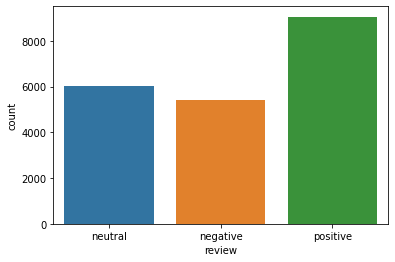

In [35]:
plt.figure(figsize = (6, 4))
sns.countplot(x=df.review)
plt.show()

In [36]:
# Check the number of classes.
df['review'].value_counts()

positive    9054
neutral     6039
negative    5398
Name: review, dtype: int64

In [37]:
# Split the data into test and split.
train,eva = train_test_split(df,test_size = 0.2)

In [38]:
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [40]:
# 0,1,2 : positive, negative, neutral
def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1
    
train['label'] = train['review'].apply(making_label)
eva['label'] = eva['review'].apply(making_label)
print(train.shape)

(16392, 4)


In [45]:
train_df = pd.DataFrame({'text': train['statement'][:2000].replace(r'\n', ' ', regex=True), 'label': train['label'][:2000]})

eval_df = pd.DataFrame({'text': eva['statement'][-500:].replace(r'\n', ' ', regex=True),'label': eva['label'][-500:]})

In [46]:
model.train_model(train_df)

  0%|          | 0/2000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/250 [00:00<?, ?it/s]

(250, 0.7863220543265342)

In [47]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/63 [00:00<?, ?it/s]

In [48]:
result

{'mcc': 0.5077382941885381, 'eval_loss': 0.6704851483541822}

In [49]:
model_outputs

array([[ 0.81303251, -0.98372906,  1.22052741],
       [-1.68942165,  3.02422929, -0.79038149],
       [ 2.11366606, -2.06769776,  0.80704391],
       ...,
       [-0.88062906,  1.52526939,  0.0964471 ],
       [ 0.35101265, -0.62137127,  1.16337931],
       [ 1.70864511, -1.47830939,  1.01746535]])

In [50]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))
true = eval_df['label'].tolist()
predicted = lst

import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[170,   8,  33],
       [  4, 108,  19],
       [ 72,  25,  61]])

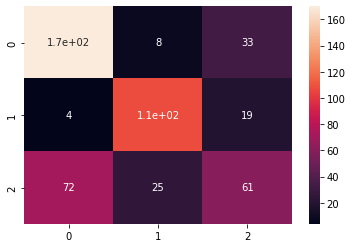

In [51]:
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True) 
plt.show()

In [52]:
sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative'])

'              precision    recall  f1-score   support\n\n    positive       0.69      0.81      0.74       211\n     neutral       0.77      0.82      0.79       131\n    negative       0.54      0.39      0.45       158\n\n    accuracy                           0.68       500\n   macro avg       0.67      0.67      0.66       500\nweighted avg       0.66      0.68      0.66       500\n'

In [53]:
sklearn.metrics.accuracy_score(true,predicted)

0.678

In [54]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positive', 1:'negative', 2:'neutral'}
    print(sentiment_dict[pos])
    return

In [55]:
## neutral statement
get_result("According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative


In [56]:
## positive statement
get_result("According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative


In [57]:
## negative statement
get_result('Sales in Finland decreased by 2.0 % , and international sales decreased by 9.3 % in terms of euros , and by 15.1 % in terms of local currencies .')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative


In [58]:
get_result("great app interface")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [59]:
get_result("the vaccify application isn't so useable at all. I wish they did better")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative


In [60]:
get_result("He gave me good advice, on how to handle the plan in my absence great full... keep up ur good job... Salute!")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [61]:
get_result("i hate and love it")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative


In [62]:
get_result("fail")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative


In [63]:
get_result("My debit order was processed earlier than agreed. My bank charged me R115 fot thr returned debit order. I also have a bad record on my account now")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative


In [64]:
get_result("Lebohang Senakgomo was excellent. My claim was efficiently and promptly sorted.")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [66]:
get_result('I had a car insurance with Hollard,and they automatically transferd my policy to DOTSURE who just scammed me and added their 3 new policies to further deduct from me.I would like to warn everyone who has a policy with DOTSURE.... "RUN FOR YOUR LIFE WHILE YOU HAVE TIME " Right now I\'m going')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative


In [68]:
import pickle
pickle.dump(model, open('sentiment_analysis_BERT_based.pkl', 'wb'))

In [69]:
get_result('It been a nightmare if I knew better I would have not wasted my money paying for services that I wouldn\'t be able to utilize. Dotsure insurance failed me as they clients. My very first time claiming Dotsure disappointes me it tooked them 2 full months to get my car repaired.... I had to wait another 6')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative


In [70]:
get_result("I've been a client of dotsure in the past and was once again provided with the same excellent service I've come to expect from these guys. Gershwin Lewis was extremely efficient and had everything sorted in less than 30 minutes. He even went as far as calling me back after we got disconnected. As ")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [71]:
get_result("I got assisted with everything I needed.")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [88]:
from google.colab import files
files.download('sentiment_analysis_BERT_based.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
get_result("Gabriella Julies was wonderful and I'd highly recommend her. She was very friendly, professional and helpful.")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [74]:
get_result("super fun and enjoyable. I appreciate a game that I can pay for up front, and simply enjoy. When is Agent B coming out?")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [75]:
get_result("Please make another game just like this!!!")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative


In [76]:
get_result("Please make another game just like this!!! This was the best game i have ever played")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [77]:
get_result("Are we getting an agent a part 2?! this is my favorite game and ")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [78]:
get_result("This is the best game I’ve played on ios. Story, cinematography")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [79]:
get_result("Good little app, well worth paying for. allows you to get rid of the spam. Keeps your customers upto date")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [80]:
get_result("I used and it works it is enough, was so yeasy to install what I disturbe me is about to have to put into each page for. But was a good experience see that working in my website")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [81]:
get_result("Great app, easy to use and install. Can be added on all pages on a website and it's beautiful. Highly recommended")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [82]:
get_result("I like the easy aspect of it, but it has some problems while installing it. I hope it will work good")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [83]:
get_result("Straight forward, easy to use application. Delivers as advertised. Thank you!.........................")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [85]:
get_result("I love this app, awesome way for the customer to leave a review and rating...great addition to any shop, thank you!")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [87]:
get_result("Beware!!! I added this app to my store. The app didn't work properly, so I contacted support. Support said they were unable to help me because they could not find my account, and i was not a customer. I uninstalled the app, although it was setup on my store. In the meantime, this company charged me a monthly subscription fee although they were not able to find me as a customer when i needed their help. When i asked for a refund, this was the response 'Refunds are issued for yearly and biennial subscriptions if cancelled within **5 days** of initial purchase.' This is such nonsense. There are better apps out there.")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative
